In [2]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib

In [3]:
from sklearn import datasets

# load dataset
iris=datasets.load_iris()
features=iris.data
target=iris.target

# generate a pandas dataframe
df= pd.DataFrame(features)
df.columns=iris.feature_names
print(target)
print(iris.target_names)

# dataset information
print(df.shape)
print(df)

# print dataset descriptions
print(df.describe())

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
(150, 4)
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3   

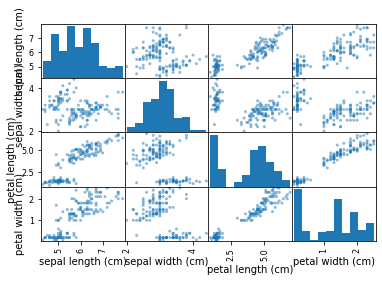

In [4]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# display scatter plot matrix
scatter_matrix(df)
plt.show()

In [5]:
# elbow method to determine optimal number of clusters

from sklearn.cluster import KMeans

# empty x and y data lists
X=[]
Y=[]

for i in range (1,31):
    # initialise and fit the kmeans model
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(df)
    
    # append no of clusters to x data list
    X.append(i)
    
    # append the average within cluster sum of squares to y data list
    awcss=kmeans.inertia_ / df.shape[0]
    Y.append(awcss)

In [6]:
print(X)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [7]:
print(Y)

[4.542470666666664, 1.0156530117357199, 0.5256762761743067, 0.3815231547619048, 0.3096412136752136, 0.26044023569023583, 0.22866474747474763, 0.2012437012987013, 0.1877334688995217, 0.17227324425436227, 0.16188821298589445, 0.15451517099372356, 0.1441102634500003, 0.1351821468443837, 0.1298487690185059, 0.1163707483354852, 0.11244770424020421, 0.10841220002220003, 0.10525380952380956, 0.09934704776704782, 0.0954362398712399, 0.09184649470899472, 0.08891636363636364, 0.08396623496873504, 0.08223433862433865, 0.07829245550745549, 0.07660472582972588, 0.0740301851851852, 0.07142863636363637, 0.06873633597883595]


Text(0.5, 1.0, 'K means clustering elbow method')

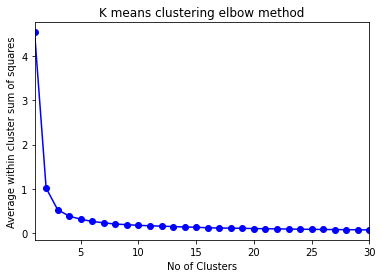

In [8]:
import matplotlib.pyplot as plt

# plot the x and y data
plt.plot(X,Y, 'bo-')
plt.xlim((1,30))
plt.xlabel('No of Clusters')
plt.ylabel('Average within cluster sum of squares')
plt.title('K means clustering elbow method')

In [9]:
## Principle Component Analysis

In [10]:
from sklearn.decomposition import PCA
from sklearn import preprocessing


In [11]:
# perform PCA
pca= PCA(n_components=2)
pc=pca.fit_transform(df)

# printing new dimesnions
print(pc.shape)
print(pc[:10])

(150, 2)
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]]


In [16]:
# re-fit the kmeans model with appropriate no of clusters
kmeans=KMeans(n_clusters=3)
kmeans.fit(pc)

KMeans(n_clusters=3)

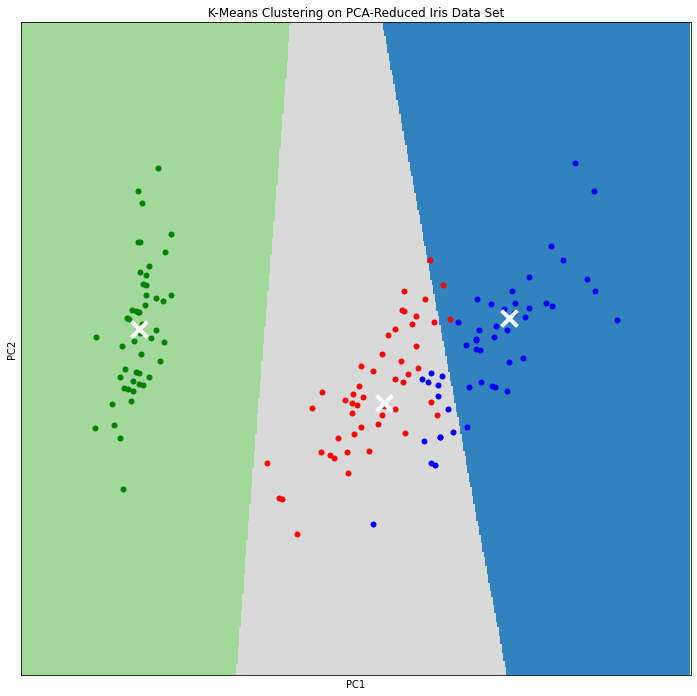

In [17]:
# Visualize high dimensional clusters using principle components

# set size for the mesh
h = 0.02 # determines quality of the mesh [x_min, x_max]x[y_min, y_max]

# generate mesh grid
x_min, x_max = pc[:, 0].min() - 1, pc[:, 0].max() + 1
y_min, y_max = pc[:, 1].min() - 1, pc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# label each point in mesh using last trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# generate color plot from results
Z = Z.reshape(xx.shape)
plt.figure(figsize = (12, 12))
plt.clf()
plt.imshow(Z, interpolation = 'nearest',
          extent = (xx.min(), xx.max(), yy.min(), yy.max()),
          cmap = plt.cm.tab20c,
          aspect = 'auto', origin = 'lower')

# plot the principle components on the color plot
for i, point in enumerate(pc):
    if target[i] == 0:
        plt.plot(point[0], point[1], 'g.', markersize = 10)
    if target[i] == 1:
        plt.plot(point[0], point[1], 'r.', markersize = 10)
    if target[i] == 2:
        plt.plot(point[0], point[1], 'b.', markersize = 10)

# plot the cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 250, linewidth = 4,
           color = 'w', zorder = 10)

# set plot title and axis limits
plt.title('K-Means Clustering on PCA-Reduced Iris Data Set')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xticks(())
plt.yticks(())

# display the plot
plt.show()

In [20]:
from sklearn import metrics

# k means clustering in non-reduced data
kmeans1=KMeans(n_clusters=3)
kmeans1.fit(features)

# k means clustering in reduced data
kmeans2=KMeans(n_clusters=3)
kmeans2.fit(pc)

# print metrics for non- reduced data
print('Non-reduced data')
print('Homogeneity: {}'.format(metrics.homogeneity_score(target, kmeans1.labels_)))
print('Completeness: {}'.format(metrics.completeness_score(target, kmeans1.labels_)))
print('V-measure: {}'.format(metrics.v_measure_score(target, kmeans1.labels_)))

# print metrics for reduced data
print('Non-reduced data')
print('Homogeneity: {}'.format(metrics.homogeneity_score(target, kmeans2.labels_)))
print('Completeness: {}'.format(metrics.completeness_score(target, kmeans2.labels_)))
print('V-measure: {}'.format(metrics.v_measure_score(target, kmeans2.labels_)))



Non-reduced data
Homogeneity: 0.7514854021988338
Completeness: 0.7649861514489815
V-measure: 0.7581756800057784
Non-reduced data
Homogeneity: 0.7364192881252849
Completeness: 0.7474865805095324
V-measure: 0.7419116631817836


In [27]:
# compare results
print(kmeans1.labels_)
print(kmeans2.labels_)
print(target)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
